# Computation Graphs

[PyTorch](https://pytorch.org/) is a flexible deep learning framework that allows automatic differentiation through dynamic neural networks (i.e., networks that utilise dynamic control flow like if statements and while loops). It supports GPU acceleration, distributed training, C++ deployment and much more. By default, PyTorch acts as an imperative language and operations are executed in the order they are called. Version 1.0 introduces a just-in-time (JIT) compiler that can optimise models, and so these two modes are similar to the "eager" and "graph" modes of TensorFlow, respectively.

It's best to start with the [official tutorials](https://pytorch.org/tutorials/) - in particular, [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). For practical tips, check out [Grokking PyTorch](https://github.com/Kaixhin/grokking-pytorch). Consider these two as prerequisites.

## Computation Graph with Side-Effects

A computation graph can be very general. To drive this home, we're going to make a "neural network" that takes an arbitrary tensor as input, queries a website for a random cat image, displays this image as a side-effect of its execution, and then returns the input tensor + 1 if the image was a JPEG or PNG, or the input tensor - 1 if the image was a GIF. More practically, we can also print data during the forward pass of the network - an ability that makes debugging much easier.

In [2]:
import json
import requests
import torch
from torch import nn
from IPython.display import display, Image

In [3]:
class RandomCatNet(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        # Print tensor size (useful for debugging)
        print('Input size:', x.size())
        # Call a website API to get an image synchronously
        r = requests.get(url='https://api.thecatapi.com/v1/images/search?size=small')
        data = json.loads(r.text)
        url = data[0]['url']
        display(Image(url))
        # Dynamically return an output conditional on the file format of the image returned
        if url[-3:] == 'gif':
            return x - 1
        else:
            return x + 1

tensor([ 0.3996,  1.6913, -0.4992,  1.0731, -0.3295])

Input size: torch.Size([5])


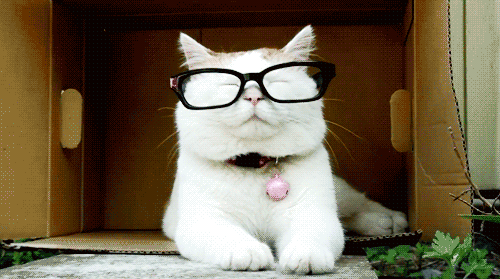

tensor([-0.6004,  0.6913, -1.4992,  0.0731, -1.3295])

In [5]:
model = RandomCatNet()
x = torch.randn(5)
display(x)

y = model(x)
display(y)